# Bike Sharing Case Study

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands 

In [40]:
# Analysis Steps
# 1. Importing and Understanding the Data
# 2. Cleaning Data
# 3. EDA
# 4. Data Preparation
# 5. Model Building
# 6. Residual Analysis
# 7. Making Predictions using model
# 8. Model Evaluation

### Step 1: Importing and Understanding Data

In [470]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [471]:
BikeSharing_Data = pd.read_csv('day.csv')

In [472]:
BikeSharing_Data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [473]:
#Checking initial Number of Rows and Columns in data
print("Number of Rows:", BikeSharing_Data.shape[0])
print("Number of Columns:", BikeSharing_Data.shape[1])

# Observation: We have 730 rows and 16 column in initial dataset

Number of Rows: 730
Number of Columns: 16


In [474]:
#Checking info on data 
BikeSharing_Data.info()

# Observation: We have mixed data type in dataset (int,float and object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [475]:
#Describing data to understand basic statistical values 
BikeSharing_Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [476]:
#Checking for Duplicate in data
BikeSharing_Data[BikeSharing_Data.duplicated() == True]

#Observation: There are no duplicates in data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [477]:
#Checking for % of null values in columns
BikeSharing_Data.isnull().sum()

#Observation: There are no missing values in dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Summary: Understanding the Data
- The dataset contains 730 rows and 16 columns.
- The dataset includes a variety of data types.
- No duplicate rows are present in the dataset.
- The dataset is complete with no missing values.

### Step 2: Data Cleaning

In [480]:
BikeSharing_Data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [481]:
# Dropping the columns 'casual' and 'registered' as we have the 'cnt' column, which is the sum of both, and it also serves as our target variable.
BikeSharing_Data.drop(['casual','registered'],inplace=True,axis=1)                                                                                                                             

In [482]:
BikeSharing_Data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [483]:
# Dropping 'instant' as it is an index column and not useful to us, dropping 'dtedata' as we already have derived date fields available in the dataset.
BikeSharing_Data.drop(['instant','dteday'],inplace=True,axis=1)

Mapping Values in columns as per Data Dictionary

- Mapping values in column season, yr, mnt, weekday, weathersit, workingday, holiday as per data dictionary
- season : season (1: spring, 2: summer, 3: fall, 4: winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec')
- holiday : Whether day is a holiday or not (0: No Holiday, 1: Holiday)
- weekday : day of the week (0: 'Mon', 1: 'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun')
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0 (0:'Holiday',1:'Working Day').
- weathersit : 
     1. Clear, Few clouds, Partly cloudy, Partly cloudy
     2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
     3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
     4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [485]:
BikeSharing_Data['season'] = BikeSharing_Data['season'].map({1: 'spring',2:'summer',3:'fall',4:'winter'})
BikeSharing_Data['yr'] = BikeSharing_Data['yr'].map({0: '2018',1:'2019'})
BikeSharing_Data['mnth'] = BikeSharing_Data['mnth'].map({1: 'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
BikeSharing_Data['weekday'] = BikeSharing_Data['weekday'].map({0: 'Sun',1: 'Mon',2: 'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
BikeSharing_Data['weathersit'] = BikeSharing_Data['weathersit'].map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain ',4:'Heavy Snow & Rain'})
BikeSharing_Data['workingday'] = BikeSharing_Data['workingday'].map({0:'Holiday',1:'Working Day'})
BikeSharing_Data['holiday'] = BikeSharing_Data['holiday'].map({0:'No Holiday',1:'Holiday'})

In [486]:
BikeSharing_Data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No Holiday,Sat,Holiday,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No Holiday,Sun,Holiday,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No Holiday,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No Holiday,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No Holiday,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,2018,Jan,No Holiday,Thu,Working Day,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,2018,Jan,No Holiday,Fri,Working Day,Mist & Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,2018,Jan,No Holiday,Sat,Holiday,Mist & Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,2018,Jan,No Holiday,Sun,Holiday,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,2018,Jan,No Holiday,Mon,Working Day,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [501]:
BikeSharing_Data.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [503]:
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols = ['temp','atemp','hum','windspeed']
target_col = ['cnt']

#### Summary: Data Cleaning
- The columns 'casual' and 'registered' have been removed because the 'cnt' column, which represents their sum, also serves as our target variable.
- The 'instant' column has been dropped as it is merely an index column and not useful for our analysis, and the 'dteday' column has been dropped since we have already derived the necessary date fields.
- Meaningful values have been mapped in the columns according to the data dictionary.

### Step 3: EDA

<Figure size 1500x800 with 0 Axes>

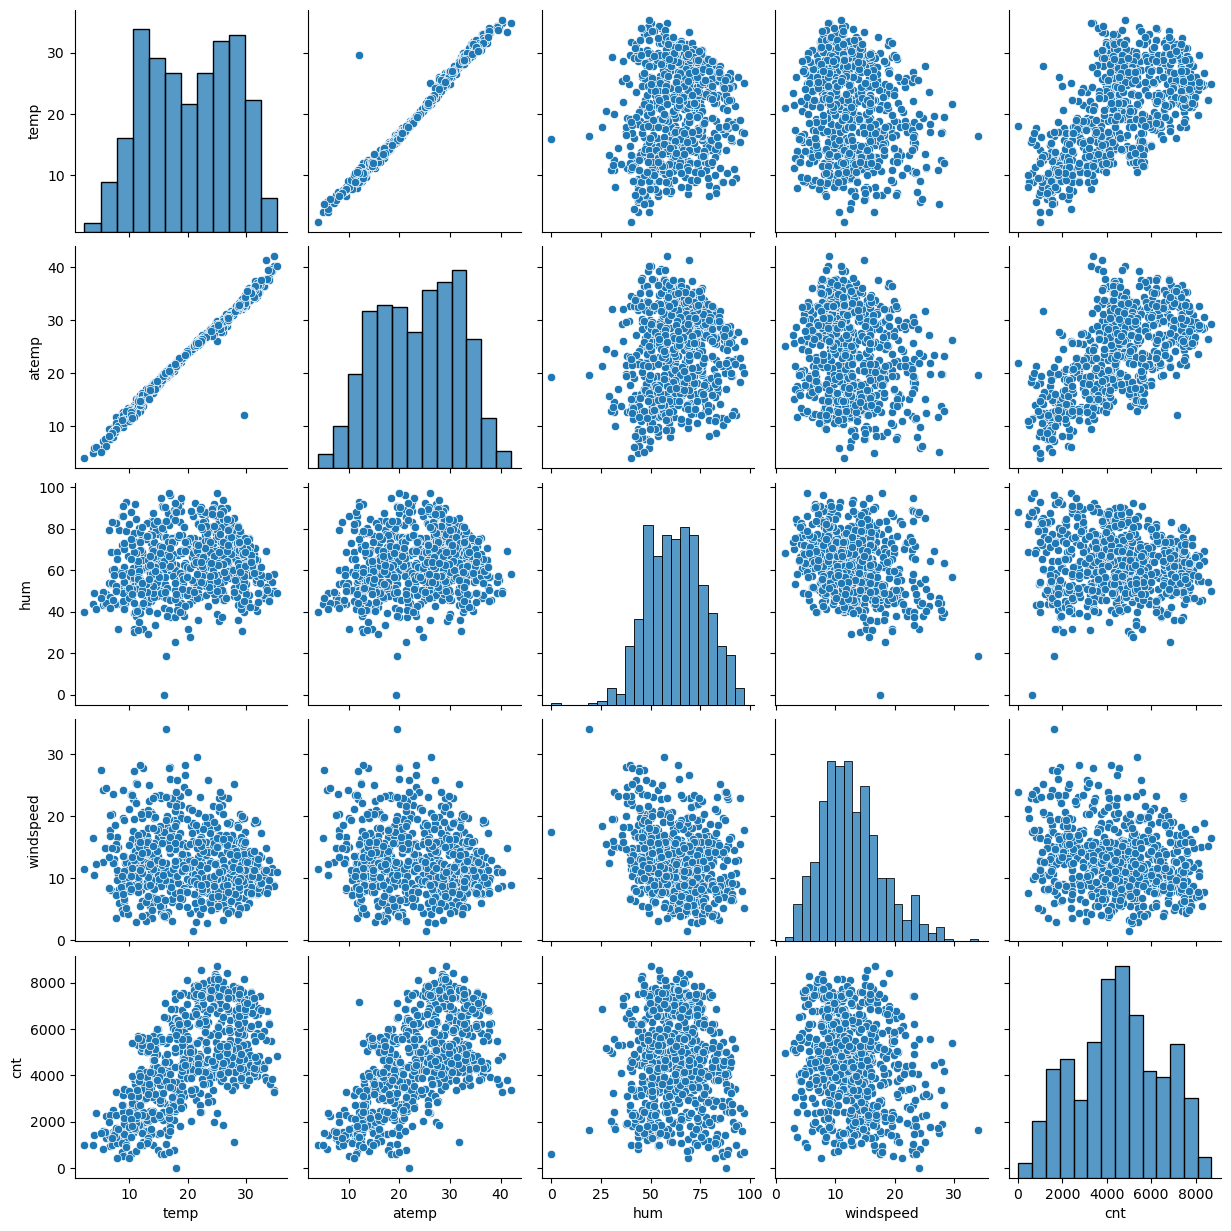

In [505]:
plt.figure(figsize=(15,8))
sns.pairplot(BikeSharing_Data)
plt.show()

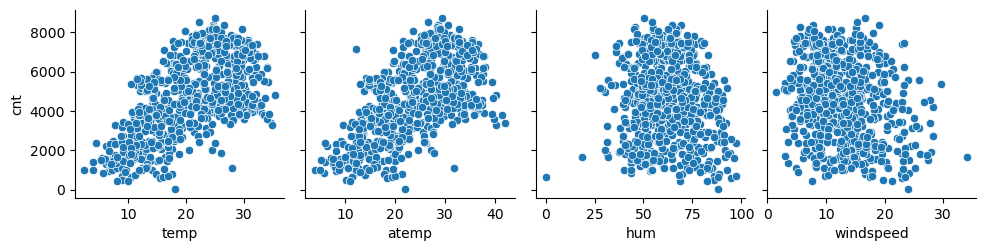

In [507]:
sns.pairplot(data=BikeSharing_Data,x_vars=cont_cols,y_vars=target_col,)
# Observation: The 'cnt' variable shows some correlation with 'temp', 'atemp', 'hum', and 'windspeed', which suggests that a linear model could be suitable for our analysis.
# The 'temp' and 'atemp' variables appear to be highly correlated; further analysis is required on these two variables.

In [59]:
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

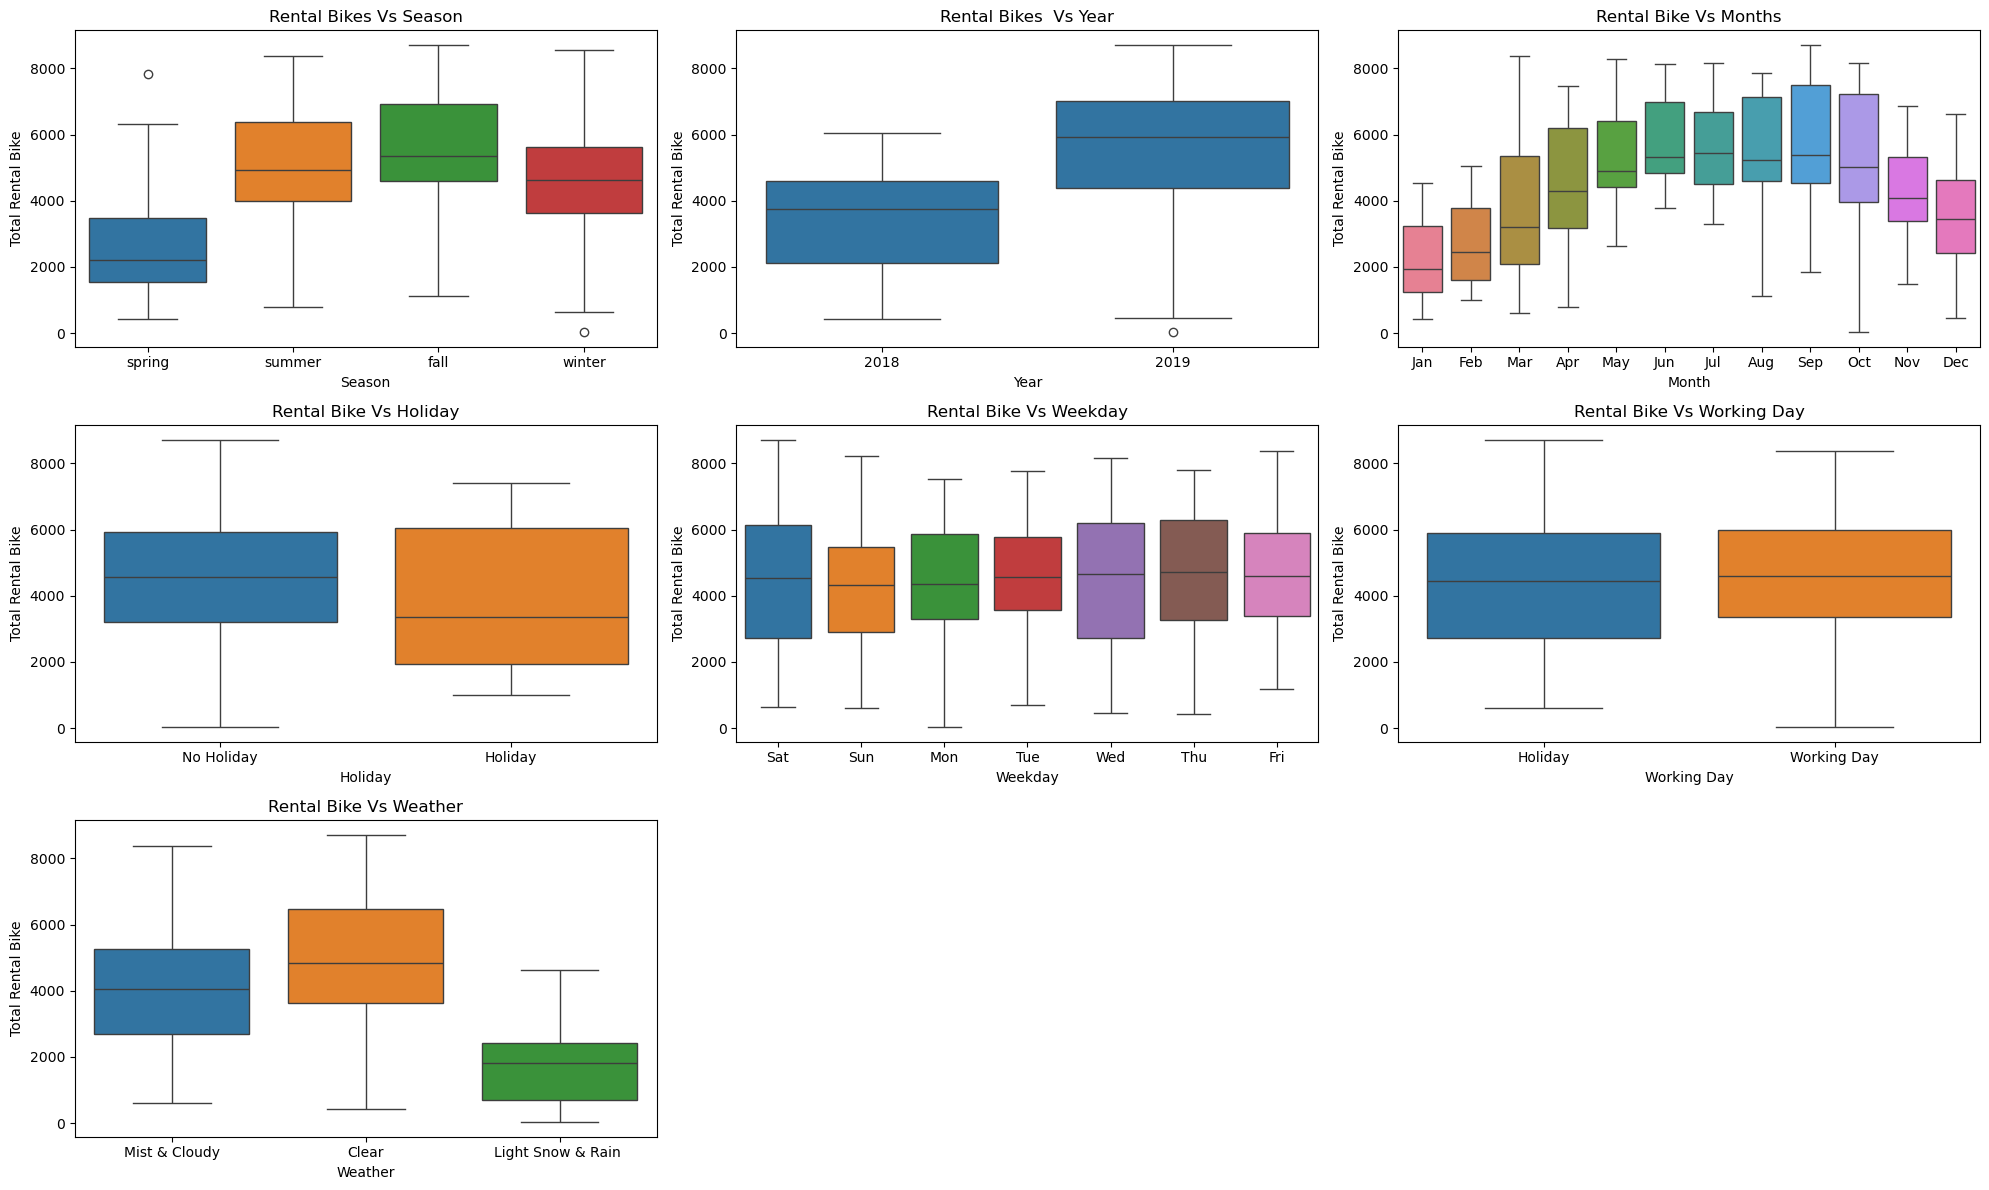

In [509]:
# Creating a box plot to examine the distribution of a categorical variable against the target variable 'cnt'.

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeSharing_Data,hue='season')
plt.xlabel('Season')
plt.ylabel('Total Rental Bike')
plt.title('Rental Bikes Vs Season')

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BikeSharing_Data)
plt.xlabel('Year')
plt.ylabel('Total Rental Bike')
plt.title('Rental Bikes  Vs Year')

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeSharing_Data,hue='mnth')
plt.xlabel('Month')
plt.ylabel('Total Rental Bike')
plt.title('Rental Bike Vs Months')

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikeSharing_Data,hue='holiday')
plt.xlabel('Holiday')
plt.ylabel('Total Rental Bike')
plt.title('Rental Bike Vs Holiday')

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikeSharing_Data,hue='weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Rental Bike')
plt.title('Rental Bike Vs Weekday')

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = BikeSharing_Data,hue='workingday')
plt.xlabel('Working Day')
plt.ylabel('Total Rental Bike')
plt.title('Rental Bike Vs Working Day')

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeSharing_Data,hue='weathersit')
plt.xlabel('Weather')
plt.ylabel('Total Rental Bike')
plt.title('Rental Bike Vs Weather')

plt.tight_layout()

# No outliers in data across all categorical variables.
# Higher number of rental bike bookings in the summer and fall seasons compared to winter and spring.
# The number of bookings for rental bikes has increased significantly in 2019.
# There are more rental bike bookings on working days compared to holidays.
# The number of bookings remains roughly the same throughout the week.
# There are no bookings when the weather is 'Heavy Rain', and very few bookings when it's raining.

<Axes: >

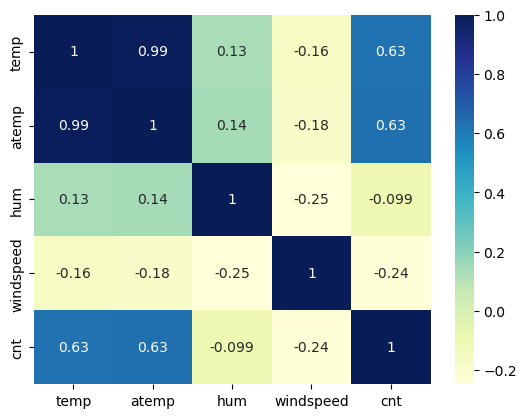

In [511]:
cont_cols.append('cnt')
sns.heatmap(BikeSharing_Data[cont_cols].corr(),annot = True, cmap="YlGnBu")

In [513]:
# There is a very high correlation of 0.99 between 'temp' and 'atemp', indicating that they represent almost the same values. 
# This can lead to unnecessary problems in model building; therefore, it is advisable to retain only one of these columns in our dataset.

BikeSharing_Data.drop(['atemp'],inplace=True,axis=1)

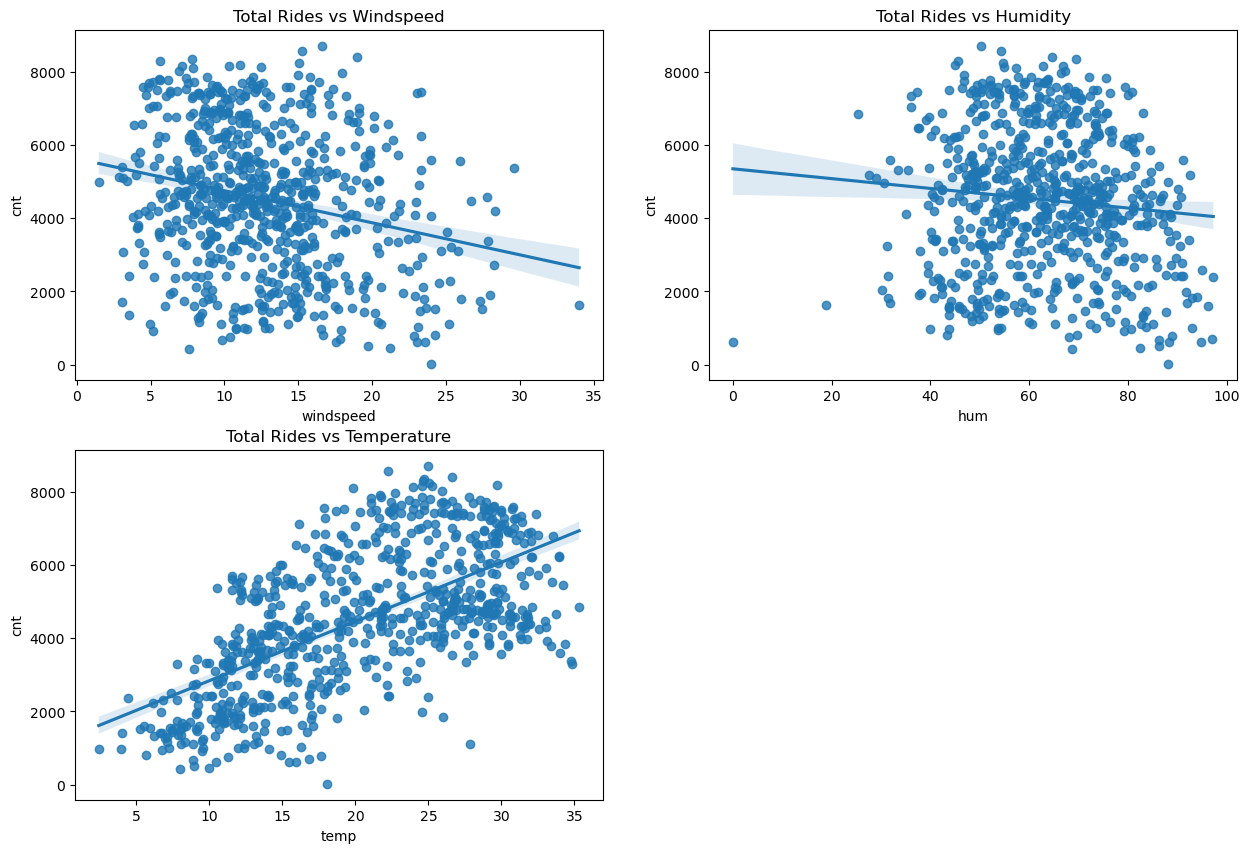

In [63]:
plt.figure(plt.figure(figsize=(15, 10)))
plt.subplot(2,2,1)
plt.title("Total Rides vs Windspeed",fontsize=12)
sns.regplot(data=BikeSharing_Data,y="cnt",x="windspeed")


plt.subplot(2,2,2)
plt.title("Total Rides vs Humidity",fontsize=12)
sns.regplot(data=BikeSharing_Data,y="cnt",x="hum")


plt.subplot(2,2,3)
plt.title("Total Rides vs Temperature",fontsize=12)
sns.regplot(data=BikeSharing_Data,y="cnt",x="temp")

#plt.subplot(2,2,4)
#plt.title("Total Rides vs Feeling Temperature",fontsize=12)
#sns.regplot(data=BikeSharing_Data,y="cnt",x="atemp")

plt.show()

# Observation: Total rental bookings display a negative correlation with humidity and wind speed, and a positive correlation with temperature.

In [515]:
BikeSharing_Data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,No Holiday,Sat,Holiday,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,No Holiday,Sun,Holiday,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,No Holiday,Mon,Working Day,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,No Holiday,Tue,Working Day,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,No Holiday,Wed,Working Day,Clear,9.305237,43.6957,12.522300,1600


In [517]:
# Checking season belong to which months in dataset 
BikeSharing_Data.pivot_table(index='mnth',values = 'cnt',columns='season',aggfunc='count')

season,fall,spring,summer,winter
mnth,,,,
Apr,NaN,NaN,60.0,NaN
Aug,62.0,NaN,NaN,NaN
Dec,NaN,22.0,NaN,40.0
Feb,NaN,56.0,NaN,NaN
Jan,NaN,62.0,NaN,NaN
Jul,62.0,NaN,NaN,NaN
Jun,20.0,NaN,40.0,NaN
Mar,NaN,40.0,22.0,NaN
May,NaN,NaN,62.0,NaN


#### Summary: EDA
- The 'cnt' variable shows some correlation with 'temp', 'atemp', 'hum', and 'windspeed', which suggests that a linear model could be suitable for our analysis.
-  The 'temp' and 'atemp' variables appear to be highly correlated; further analysis is required on these two variables.
- No outliers in data across all categorical variables.
- Higher number of rental bike bookings in the summer and fall seasons compared to winter and spring.
- The number of bookings for rental bikes has increased significantly in 2019.
- There are more rental bike bookings on working days compared to holidays.
- The number of bookings remains roughly the same throughout the week.
- There are no bookings when the weather is 'Heavy Rain', and very few bookings when it's raining.
- There is a very high correlation of 0.99 between 'temp' and 'atemp', indicating that they represent almost the same values. This can lead to unnecessary problems in model building; therefore, it is advisable to retain only one of these columns in our dataset.
- Total rental bookings display a negative correlation with humidity and wind speed, and a positive correlation with temperature.

### Step 4 Data Preparation 
- Dummy Vairable </br>
  We need to convert categorical vaiables into dummy variables into scale of 0 and 1
- Spliting into Train test </br>
  Split the whole dataset into 70:30 trainning and testing set.
- Rescaling </br>
  It is important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients


In [519]:
BikeSharing_Data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,No Holiday,Sat,Holiday,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,No Holiday,Sun,Holiday,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,No Holiday,Mon,Working Day,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,No Holiday,Tue,Working Day,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,No Holiday,Wed,Working Day,Clear,9.305237,43.6957,12.522300,1600


### Creating Dummy variable

In [520]:
varlist = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
BikeSharing_Data[varlist]

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,Jan,No Holiday,Sat,Holiday,Mist & Cloudy
1,spring,2018,Jan,No Holiday,Sun,Holiday,Mist & Cloudy
2,spring,2018,Jan,No Holiday,Mon,Working Day,Clear
3,spring,2018,Jan,No Holiday,Tue,Working Day,Clear
4,spring,2018,Jan,No Holiday,Wed,Working Day,Clear
...,...,...,...,...,...,...,...
725,spring,2019,Dec,No Holiday,Thu,Working Day,Mist & Cloudy
726,spring,2019,Dec,No Holiday,Fri,Working Day,Mist & Cloudy
727,spring,2019,Dec,No Holiday,Sat,Holiday,Mist & Cloudy
728,spring,2019,Dec,No Holiday,Sun,Holiday,Clear


In [521]:
# Creating dummy variables for all categorical column and dropping first column for each
BikeSharing_DummyVar = pd.get_dummies(BikeSharing_Data[varlist],drop_first=True,dtype='int32')

In [522]:
BikeSharing_DummyVar

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
726,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
727,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
728,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [527]:
# Joining with original data set and creating a new dataset to be used for model building
BikeSharing_Data_model = pd.concat([BikeSharing_Data,BikeSharing_DummyVar],axis=1)

In [528]:
# Dropping the columns from original dataset for each dummy variables are  created
BikeSharing_Data_model.drop(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'],axis=1,inplace=True)

In [529]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)

In [530]:
BikeSharing_Data_model.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0


### Splitting data into Train - Test Set

In [541]:
from sklearn.model_selection import train_test_split

In [542]:
# Splitting data in 70-30 for train test split 
np.random.seed(0)
df_train, df_test = train_test_split(BikeSharing_Data_model, train_size = 0.7, test_size = 0.3, random_state = 100)

In [543]:
print(df_train.shape)
print(df_test.shape)


(510, 29)
(219, 29)


### Rescaling 

In [553]:
# Importing MinMaxScaler library from sklearn., we will be using Min Max Scaler which will scale vaiable in range of 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [555]:
df_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,19.201653,55.8333,12.208807,7534,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
576,29.246653,70.4167,11.083475,7216,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
426,16.980847,62.1250,10.792293,4066,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
728,10.489153,48.3333,23.500518,1796,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
482,15.443347,48.9583,8.708325,4220,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [557]:
# list of variable to scale , we will not scale Dummy Variable 
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars]

,temp,hum,windspeed,cnt
653,19.201653,55.8333,12.208807,7534
576,29.246653,70.4167,11.083475,7216
426,16.980847,62.1250,10.792293,4066
728,10.489153,48.3333,23.500518,1796
482,15.443347,48.9583,8.708325,4220
...,...,...,...,...
526,29.554153,58.7917,13.916771,6664
578,30.852500,65.9583,8.666718,7261
53,9.091299,42.3043,6.305571,1917
350,10.591653,56.0833,16.292189,2739


In [558]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()

In [559]:
# Scale all the numeric variables between 0 to 1 except for dummy variable
df_train[num_vars] =  scaler.fit_transform(df_train[num_vars])

In [560]:
df_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [561]:
df_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.974510,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.676471,0.029412,0.343137
std,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.157763,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.468282,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


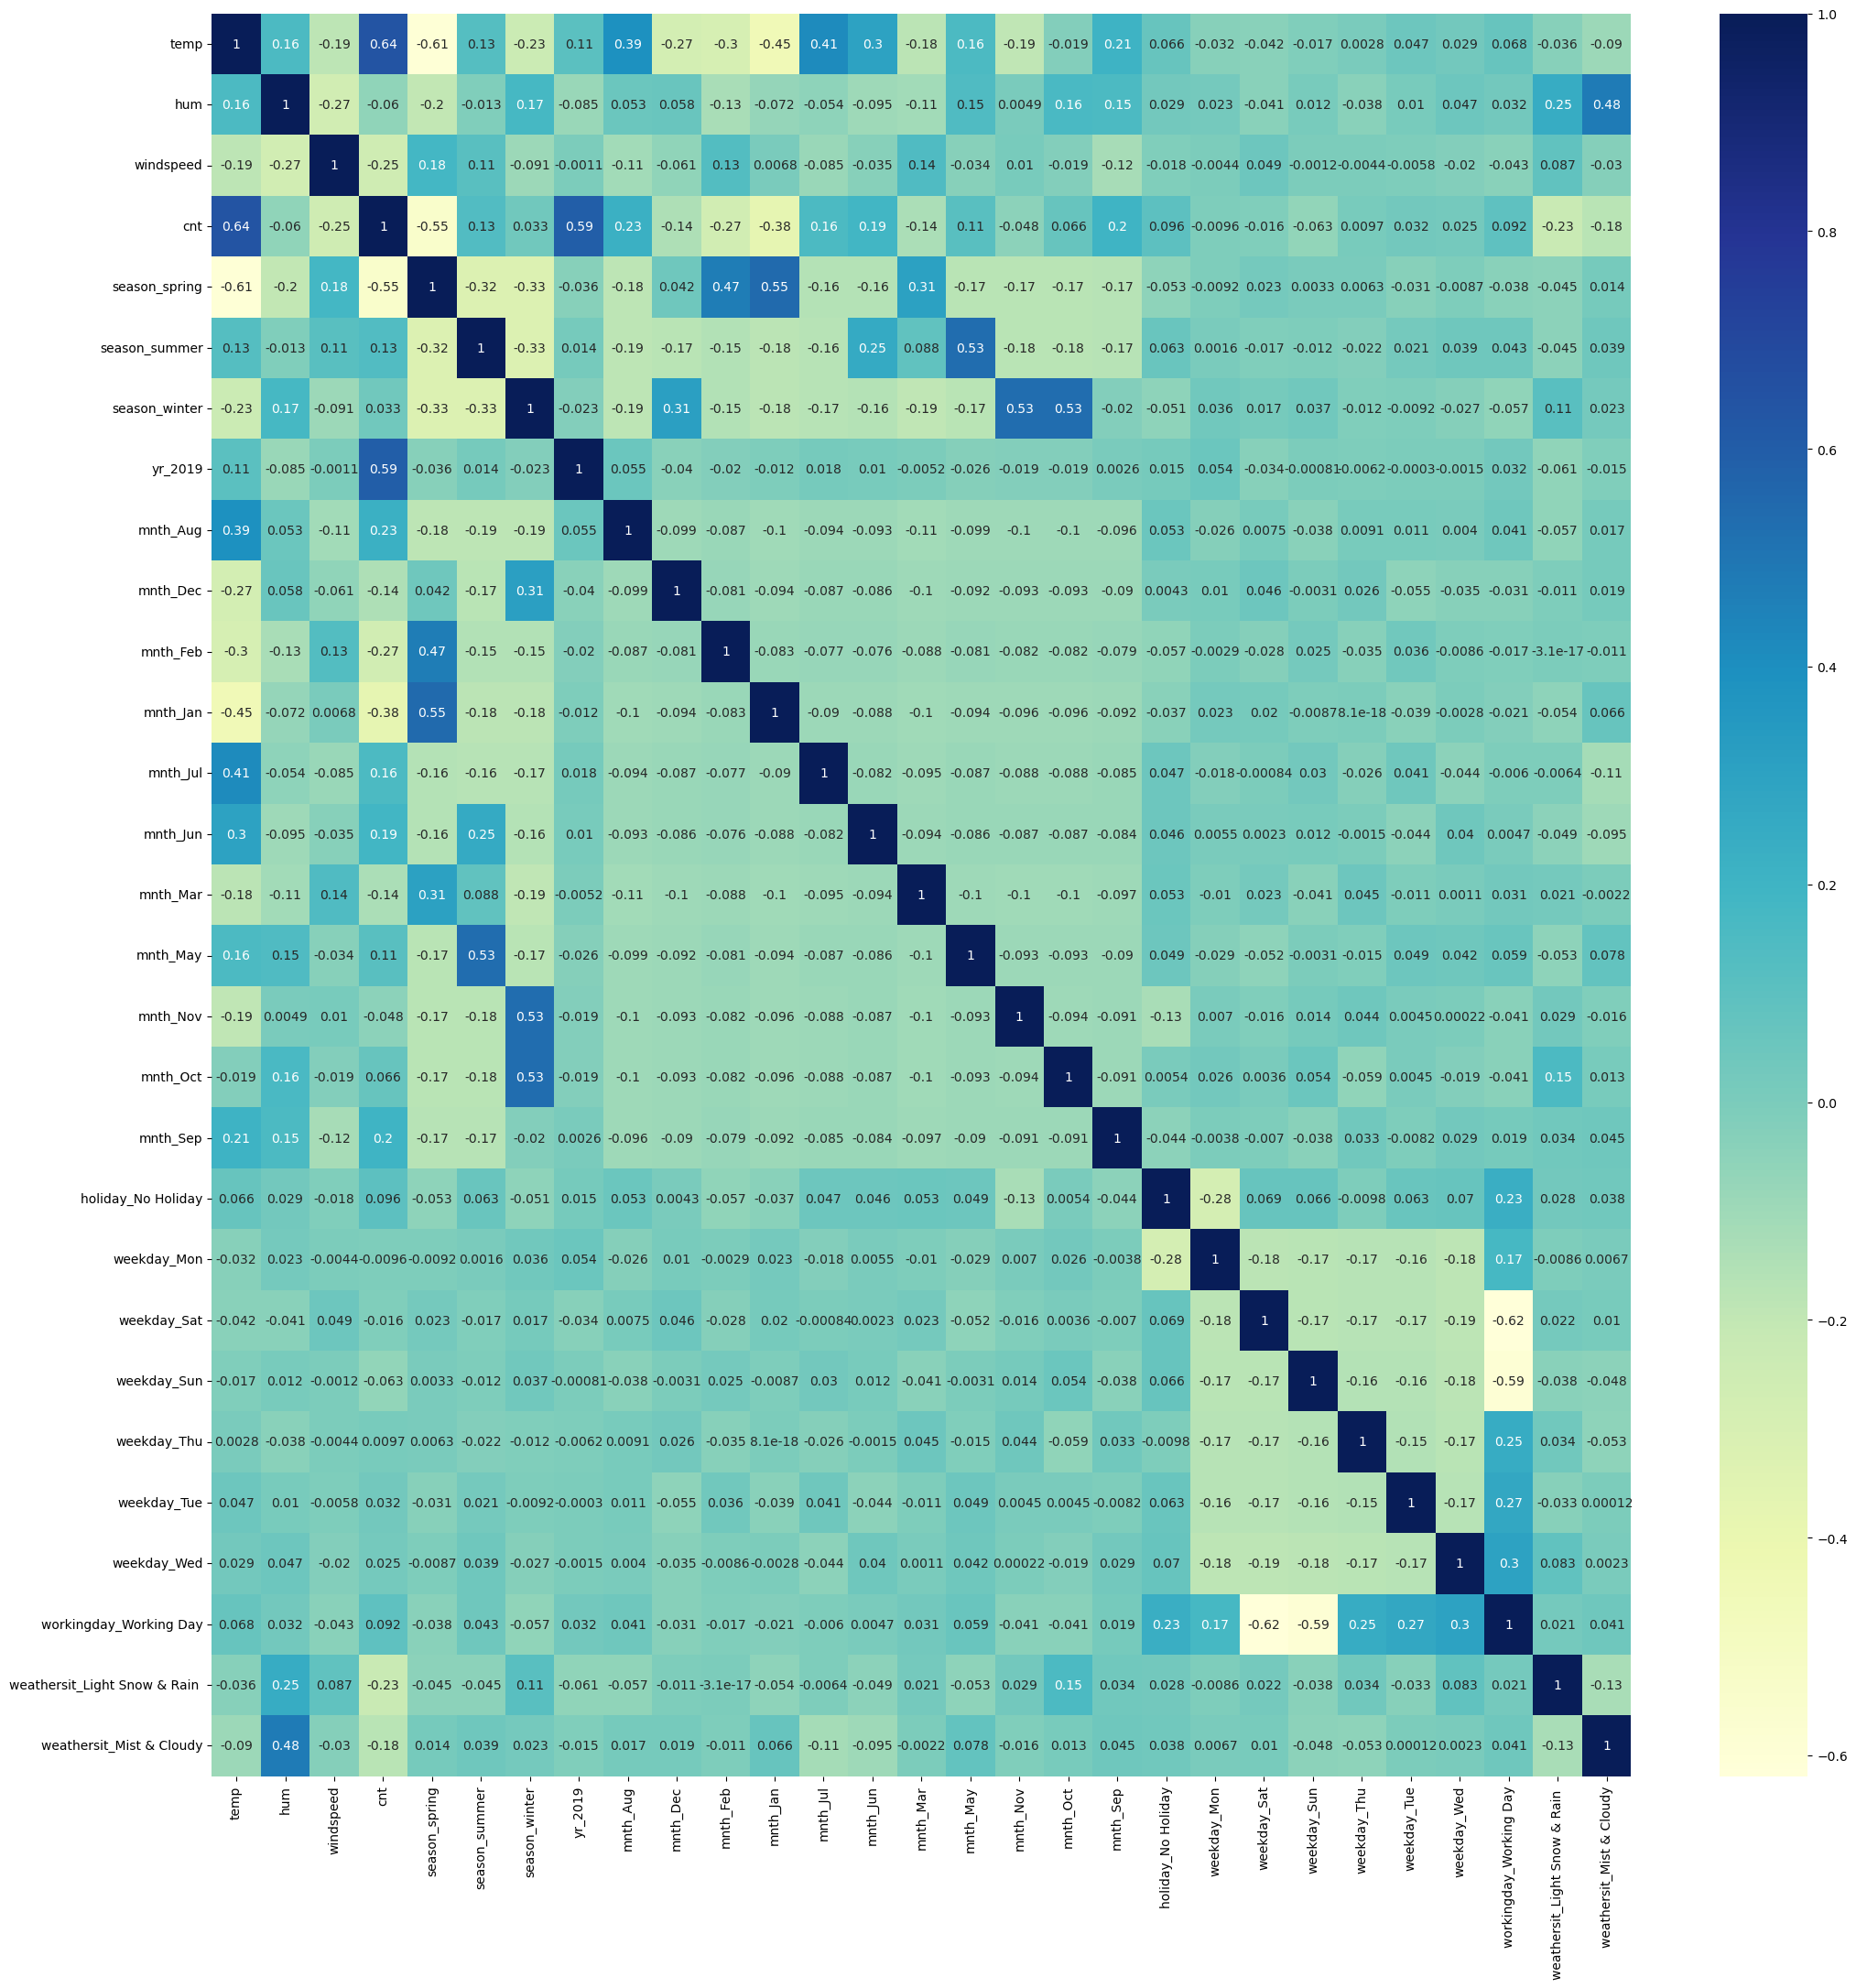

In [562]:
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Summary: Data Preparation

### Step 5 Model Building 
Approach - Bulding model by adding all variable

In [637]:
# Creating X_train and  y_train from data set 
X_train = df_train
y_train = df_train.pop('cnt')

KeyError: 'cnt'

In [ ]:
# Importing statsmodels.api library
import statsmodels.api as sm

In [640]:
# Creating First Model by adding all the variables

# Adding Constant 
X_train_sm = sm.add_constant(X_train)

# fitting X_train_sm and y_train
lr_1 = sm.OLS(y_train,X_train_sm).fit()

# Checking Params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          8.74e-182
Time:                        19:03:12   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2550      0.052      4.904      0.000       0.153       0.357
temp                              0.4506      0.046      9.734      0.000       0.360       0.542
hum                              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring                    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer                     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter                     0.1058      0.028      3.794      0.000       0.051       0.161
yr_2019                           0.2321      0.008     28.820      0.000       0.216       0.248
mnth_Aug                          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec                         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb                         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan                         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul                         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun                         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar                          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May                          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov                         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct                          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep                          0.0811      0.032      2.533      0.012       0.018       0.144
holiday_No Holiday                0.0513      0.021      2.469      0.014       0.010       0.092
weekday_Mon                      -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat                       0.0351      0.012      3.017      0.003       0.012       0.058
weekday_Sun                      -0.0194      0.012     -1.646      0.100      -0.043       0.004
weekday_Thu                      -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tue                      -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed                      -0.0054      0.015     -0.362      0.718      -0.035       0.024
workingday_Working Day            0.0356      0.010      3.730      0.000       0.017       0.054
weathersit_Light Snow & Rain     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_Mist & Cloudy         -0.0611     

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [575]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [642]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,weekday_Sun,inf
25,workingday_Working Day,inf
18,holiday_No Holiday,inf
20,weekday_Sat,inf
1,hum,39.72
0,temp,38.65
3,season_spring,12.38
5,season_winter,12.16
4,season_summer,7.93
16,mnth_Oct,6.50


In [644]:
# Dropping column 'holiday_No Holiday'  as this is already caprured in 'workingday_Working Day' column and this columns also have very high VIF

# Building second model

X_train_model_2 =  X_train.drop(['holiday_No Holiday'],axis=1)

# Adding Constant 
X_train_sm = sm.add_constant(X_train_model_2)

# Fitting X_train_sm and y_train
lr_2 = sm.OLS(y_train, X_train_sm).fit()

# Checking Params
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          8.74e-182
Time:                        19:03:23   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [646]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_2.values,i) for i in range(X_train_model_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,39.72
0,temp,38.65
24,workingday_Working Day,22.36
3,season_spring,12.38
5,season_winter,12.16
4,season_summer,7.93
19,weekday_Sat,6.59
16,mnth_Oct,6.50
7,mnth_Aug,6.29
20,weekday_Sun,6.16


In [648]:
# We observed that VIF for workingday_Working Day,weekday_Sat,weekday_Sun reduced significantly and we have two new column with high VIF (Hum & Temp)
# Dropping column whihc has high p value and checking impact on VIF (mnth_Jun  p value: 0.906 ) 

# Building thrid model
X_train_model_3 =  X_train_model_2.drop(['mnth_Jun'],axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train_model_3)

# Fitting X_train_sm and y_train
lr_3 = sm.OLS(y_train, X_train_sm).fit()

# Checking Param
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          8.38e-183
Time:                        19:03:33   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [650]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_3.values,i) for i in range(X_train_model_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,39.66
0,temp,26.38
23,workingday_Working Day,21.85
3,season_spring,12.12
5,season_winter,12.07
4,season_summer,7.33
18,weekday_Sat,6.41
19,weekday_Sun,6.01
14,mnth_Nov,5.75
15,mnth_Oct,5.73


In [652]:
# We observed that VIF for temp is reduced 
# Again Dropping column whihc has high p value and checking impact on VIF (mnth_Mar  p value: 0.837 ) 

# Building Fourth model
X_train_model_4 =  X_train_model_3.drop(['mnth_Mar'],axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train_model_4)

# fitting X_train_sm and y_train
lr_4 = sm.OLS(y_train, X_train_sm).fit()

# Checking Param
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          7.84e-184
Time:                        19:03:41   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [654]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_4.values,i) for i in range(X_train_model_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,38.17
0,temp,24.50
22,workingday_Working Day,21.15
5,season_winter,10.99
3,season_spring,8.48
4,season_summer,7.32
17,weekday_Sat,6.21
18,weekday_Sun,5.87
2,windspeed,5.21
14,mnth_Oct,4.75


In [656]:
# VIF temp,season_winter and season_spring has reduced ,Again Dropping column whihc has very high p value and checking impact on VIF (mnth_Oct  p value: 0.792 ) 

# Building Fifth model
X_train_model_5 =  X_train_model_4.drop(['mnth_Oct'],axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train_model_5)

# fitting X_train_sm and y_train
lr_5 = sm.OLS(y_train, X_train_sm).fit()

# Checking Param
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          7.40e-185
Time:                        19:03:57   Log-Likelihood:                 527.91
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -900.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [658]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_5.values,i) for i in range(X_train_model_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,36.70
0,temp,24.50
21,workingday_Working Day,21.14
3,season_spring,8.46
5,season_winter,6.74
4,season_summer,6.72
16,weekday_Sat,6.20
17,weekday_Sun,5.86
2,windspeed,5.13
7,mnth_Aug,3.26


In [660]:
# VIF temp,season_winter and season_spring has reduced ,Again Dropping column whihc has very high p value and checking impact on VIF (mnth_Aug  p value: 0.535 )  

# Building Sixth model
X_train_model_6 =  X_train_model_5.drop(['mnth_Aug'],axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train_model_6)

# fit ()
lr_6 = sm.OLS(y_train, X_train_sm).fit()

# Checking Param
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          7.99e-186
Time:                        19:04:02   Log-Likelihood:                 527.70
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     486   BIC:                            -905.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [662]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_6.values,i) for i in range(X_train_model_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,35.87
0,temp,23.00
20,workingday_Working Day,20.23
3,season_spring,6.16
15,weekday_Sat,5.90
16,weekday_Sun,5.65
2,windspeed,5.11
5,season_winter,4.47
4,season_summer,3.80
9,mnth_Jan,2.43


In [664]:
# VIF season_winter and season_spring has reduced Dropping column whihc has high p value and checking impact on VIF (weekday_Wed p value - 0.717 )  

# Building Seventh model
X_train_model_7 =  X_train_model_6.drop(['weekday_Wed'],axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train_model_7)

# fit ()
lr_7 = sm.OLS(y_train, X_train_sm).fit()

# Checking Param
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          7.47e-187
Time:                        19:04:08   Log-Likelihood:                 527.63
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -911.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [666]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_7.values,i) for i in range(X_train_model_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,35.58
0,temp,22.73
19,workingday_Working Day,19.90
3,season_spring,6.11
15,weekday_Sat,5.62
16,weekday_Sun,5.38
2,windspeed,5.10
5,season_winter,4.46
4,season_summer,3.76
9,mnth_Jan,2.43


In [668]:
# Dropping 'hum' as it has very high VIF and it will be linked with temperature 

X_train_model_8 =  X_train_model_7.drop(['hum'],axis=1)

# Building eighths model

# adding constant
X_train_sm = sm.add_constant(X_train_model_8)

# fit ()
lr_8 = sm.OLS(y_train, X_train_sm).fit()

# Checking Param
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     130.0
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.37e-184
Time:                        19:04:20   Log-Likelihood:                 519.55
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     488   BIC:                            -901.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [670]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_8.values,i) for i in range(X_train_model_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,workingday_Working Day,18.10
0,temp,15.02
2,season_spring,5.56
14,weekday_Sat,5.17
1,windspeed,4.95
15,weekday_Sun,4.83
4,season_winter,3.85
3,season_summer,3.51
8,mnth_Jan,2.33
5,yr_2019,2.10


In [672]:
# VIF for 'temp' has improved Dropping 'weekday_Sun' as it has high VIF and also high p value

# Building eighths model
X_train_model_9 =  X_train_model_8.drop(['weekday_Sun'],axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train_model_9)

# fitting X_train_sm and y_train
lr_9 = sm.OLS(y_train, X_train_sm).fit()

# Checking Param
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.5
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.94e-185
Time:                        19:04:28   Log-Likelihood:                 519.01
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     489   BIC:                            -907.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [674]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_9.values,i) for i in range(X_train_model_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.15
17,workingday_Working Day,5.60
1,windspeed,4.81
2,season_spring,4.53
4,season_winter,3.08
3,season_summer,2.90
8,mnth_Jan,2.23
5,yr_2019,2.09
14,weekday_Sat,1.88
7,mnth_Feb,1.88


In [676]:
# VIF for 'workingday_Working Day' has improved  Dropping 'weekday_Thu' as it has high p value

# Building Tenth model
X_train_model_10 =  X_train_model_9.drop(['weekday_Thu'],axis=1)

# adding constant
X_train_sm = sm.add_constant(X_train_model_10)

# fit ()
lr_10 = sm.OLS(y_train, X_train_sm).fit()

# Checking Param
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.93e-186
Time:                        19:04:37   Log-Likelihood:                 518.81
No. Observations:                 510   AIC:                            -997.6
Df Residuals:                     490   BIC:                            -912.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [678]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_10.values,i) for i in range(X_train_model_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.14
16,workingday_Working Day,5.11
1,windspeed,4.81
2,season_spring,4.52
4,season_winter,3.08
3,season_summer,2.90
8,mnth_Jan,2.23
5,yr_2019,2.09
7,mnth_Feb,1.88
14,weekday_Sat,1.88


In [680]:
# VIF for 'workingday_Working Day' has improved,  Dropping 'mnth_May' as it has high p value

X_train_model_11 =  X_train_model_10.drop(['mnth_May'],axis=1)
# Building Eleventh model

# adding constant
X_train_sm = sm.add_constant(X_train_model_11)

# fit ()
lr_11 = sm.OLS(y_train, X_train_sm).fit()

# Checking Param
print(lr_11.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          2.44e-187
Time:                        19:05:56   Log-Likelihood:                 518.33
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     491   BIC:                            -918.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [684]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_11.values,i) for i in range(X_train_model_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.99
15,workingday_Working Day,5.11
1,windspeed,4.72
2,season_spring,4.51
4,season_winter,3.08
3,season_summer,2.32
8,mnth_Jan,2.23
5,yr_2019,2.08
7,mnth_Feb,1.88
13,weekday_Sat,1.87


In [686]:
# VIF for 'season features' has improved,  Dropping 'weekday_Tue' as it has high p value


# Building Twelth model
X_train_model_12 =  X_train_model_11.drop(['weekday_Tue'],axis=1)

# adding constant
X_train_lm = sm.add_constant(X_train_model_12)

# fit ()
lr_12 = sm.OLS(y_train, X_train_lm).fit()

# Checking Param
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          4.42e-188
Time:                        19:08:00   Log-Likelihood:                 517.44
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     492   BIC:                            -922.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [688]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_12.values,i) for i in range(X_train_model_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.99
14,workingday_Working Day,4.79
1,windspeed,4.72
2,season_spring,4.51
4,season_winter,3.07
3,season_summer,2.32
8,mnth_Jan,2.23
5,yr_2019,2.08
7,mnth_Feb,1.88
13,weekday_Sat,1.87


In [694]:
# Dropping 'weekday_Mon' as it has high p valueweekday_Mon

X_train_model_13 =  X_train_model_12.drop(['weekday_Mon'],axis=1)
# Building Thirteenth model

# adding constant
X_train_sm = sm.add_constant(X_train_model_13)

# fit ()
lr_13 = sm.OLS(y_train, X_train_sm).fit()

# Checking Param
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.65e-188
Time:                        19:11:11   Log-Likelihood:                 515.78
No. Observations:                 510   AIC:                            -997.6
Df Residuals:                     493   BIC:                            -925.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [696]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_13.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_13.values,i) for i in range(X_train_model_13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.98
13,workingday_Working Day,4.74
1,windspeed,4.72
2,season_spring,4.51
4,season_winter,3.06
3,season_summer,2.32
8,mnth_Jan,2.23
5,yr_2019,2.08
7,mnth_Feb,1.88
12,weekday_Sat,1.86


In [698]:
# Dropping 'mnth_Feb' as it has high p value

X_train_model_14 =  X_train_model_13.drop('mnth_Feb',axis=1)
# Building Fourteenth model

# adding constant
X_train_lm = sm.add_constant(X_train_model_14)

# fit ()
lr_13 = sm.OLS(y_train, X_train_lm).fit()

# Checking Param
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          5.71e-189
Time:                        19:12:14   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [700]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_14.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_14.values,i) for i in range(X_train_model_14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.92
12,workingday_Working Day,4.73
1,windspeed,4.71
2,season_spring,3.09
4,season_winter,3.02
3,season_summer,2.32
5,yr_2019,2.08
11,weekday_Sat,1.86
9,mnth_Nov,1.78
7,mnth_Jan,1.67


In [702]:
X_train_model_15 =  X_train_model_14.drop(['mnth_Nov'],axis=1)
# Building Fifteenth model

# adding constant
X_train_lm = sm.add_constant(X_train_model_15)

# fit ()
lr_15 = sm.OLS(y_train, X_train_lm).fit()

# Checking Param
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          9.35e-189
Time:                        19:13:39   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -991.8
Df Residuals:                     495   BIC:                            -928.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [704]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_15.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_15.values,i) for i in range(X_train_model_15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.87
11,workingday_Working Day,4.72
1,windspeed,4.66
2,season_spring,3.09
3,season_summer,2.31
4,season_winter,2.15
5,yr_2019,2.08
10,weekday_Sat,1.86
7,mnth_Jan,1.67
8,mnth_Jul,1.59


In [706]:
X_train_model_16 =  X_train_model_15.drop(['mnth_Jul'],axis=1)
# Building Sixteenth model

# adding constant
X_train_lm = sm.add_constant(X_train_model_16)

# fit ()
lr_16 = sm.OLS(y_train, X_train_lm).fit()

# Checking Param
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.0
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.59e-188
Time:                        19:15:18   Log-Likelihood:                 507.59
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     496   BIC:                            -927.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [708]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_16.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_16.values,i) for i in range(X_train_model_16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.56
10,workingday_Working Day,4.72
1,windspeed,4.66
2,season_spring,2.96
5,yr_2019,2.07
3,season_summer,1.99
4,season_winter,1.98
9,weekday_Sat,1.86
7,mnth_Jan,1.66
12,weathersit_Mist & Cloudy,1.57


In [710]:
X_train_model_17 =  X_train_model_16.drop(['mnth_Dec'],axis=1)
# Building Seventeenth model

# adding constant
X_train_lm = sm.add_constant(X_train_model_17)

# fit ()
lr_17 = sm.OLS(y_train, X_train_lm).fit()

# Checking Param
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          7.16e-189
Time:                        19:17:04   Log-Likelihood:                 505.62
No. Observations:                 510   AIC:                            -985.2
Df Residuals:                     497   BIC:                            -930.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [712]:
vif = pd.DataFrame()
vif['Features'] = X_train_model_17.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_17.values,i) for i in range(X_train_model_17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.53
9,workingday_Working Day,4.68
1,windspeed,4.65
2,season_spring,2.87
5,yr_2019,2.07
3,season_summer,1.99
8,weekday_Sat,1.84
4,season_winter,1.77
6,mnth_Jan,1.61
11,weathersit_Mist & Cloudy,1.57


In [ ]:
# Final Variables : Finally, we get important variables which are <>
# Euqation for Linear Regression <>

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [714]:
y_train_cnt =  lr_17.predict(X_train_lm)

Text(0.5, 0, 'Errors')

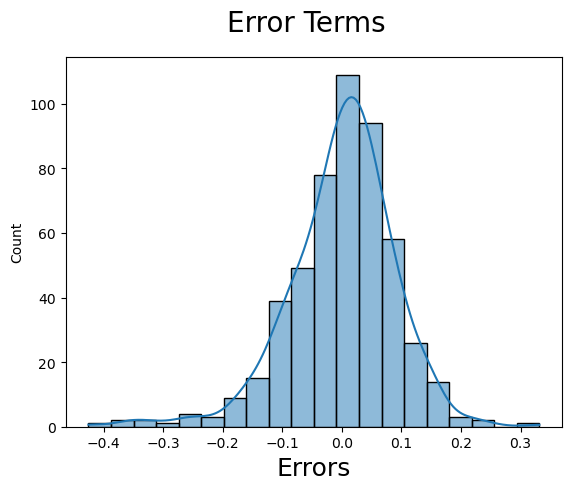

In [716]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_cnt), bins = 20,kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

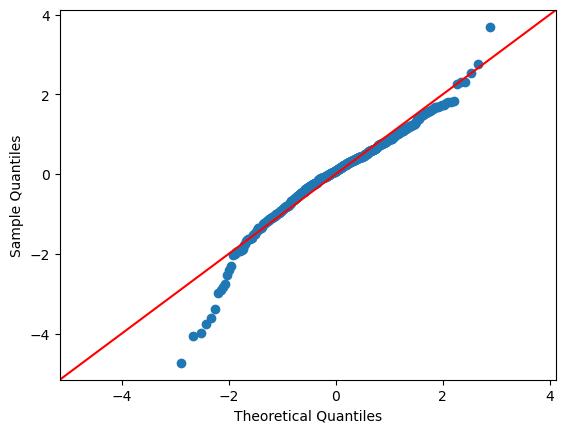

In [748]:
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

### Step 7 Making Predictions Using the Final Model

In [718]:
df_test

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
535,32.082500,59.2083,7.625404,6211,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,10.899153,68.7917,11.791732,2947,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
702,19.509153,73.3750,11.666643,6606,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
127,21.661653,63.1667,5.000712,4333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
640,26.957500,79.3750,4.458569,7572,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1


#### Applying the scaling on the test sets

In [720]:
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars]

# scaler = MinMaxScaler()
df_test[num_vars] =  scaler.transform(df_test[num_vars])
df_test.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
535,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
152,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


#### Dividing into X_test and y_test

In [722]:
y_test = df_test.pop('cnt')
X_test = df_test

In [724]:
X_test_m = sm.add_constant(X_test)

In [726]:
#Keeping only column from final train data into test set
X_test_m = X_test_m[X_train_lm.columns]

In [728]:
X_test_m

,const,temp,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Jan,mnth_Sep,weekday_Sat,workingday_Working Day,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,1.0,0.831783,0.084219,0,0,0,0,0,0,0,0,0,1
535,1.0,0.901354,0.153728,0,1,0,1,0,0,0,1,0,0
299,1.0,0.511964,0.334206,0,0,1,0,0,0,0,1,0,1
221,1.0,0.881625,0.339570,0,0,0,0,0,0,0,1,0,0
152,1.0,0.817246,0.537414,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,0.257562,0.287411,1,0,0,1,0,0,0,0,0,1
702,1.0,0.519232,0.283397,0,0,1,1,0,0,0,1,0,0
127,1.0,0.584649,0.069510,0,1,0,0,0,0,0,0,0,0
640,1.0,0.745598,0.052115,0,0,1,1,0,0,0,1,0,1


In [730]:
y_pred_m = lr_17.predict(X_test_m)

### Calculating the r-squared

In [736]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred_m)
r_squared

0.8025807413239889

In [738]:

print('r2_score of train dataset', r2_score(y_train, y_train_cnt))
print('r2_score of test dataset', r2_score(y_test, y_pred_m))

r2_score of train dataset 0.8398741954452333
r2_score of test dataset 0.8025807413239889


In [744]:
# We can see that the r_squared on the test set is 0.782 and the r-squared on the trained set 0.825 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

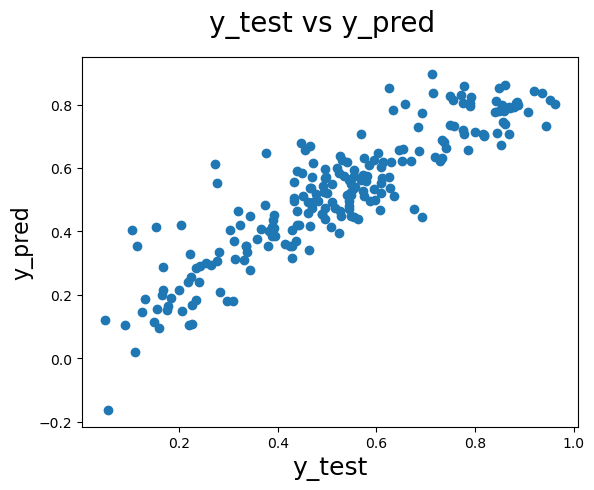

In [732]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

# <font color='Green'> Final Conclusions :

### <font color='Green'> By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

#####  y=0.1209+0.5527×temp−0.1552×windspeed+0.2332×Year2019+0.0894×summer+1.48×cloudy+0.1281×winter+0.0978×sept−0.2785×light−rain

# <font color='Green'> Final Recommendations for the Company:
#### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt. 
#### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.
With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.